In [202]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [305]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Exploratory Data Analysis

In [307]:
#Identifying null values

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [309]:
#Removing null values

df.dropna(subset=['sex'], inplace=True)
df.dropna(inplace = True)

All missing values have now been removed by simply removing the nulls in the sex column

In [312]:
#Checking for duplicates

df.duplicated().sum()

np.int64(0)

The penguin dataset has no duplicates

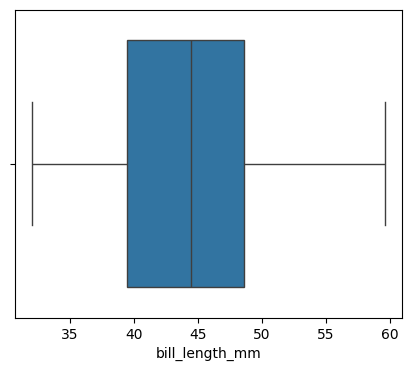

In [315]:
#Identifying outliers

plt.figure(figsize = (5,4))
sns.boxplot(x = df['bill_length_mm'])
plt.show()

Bill length column has no outliers

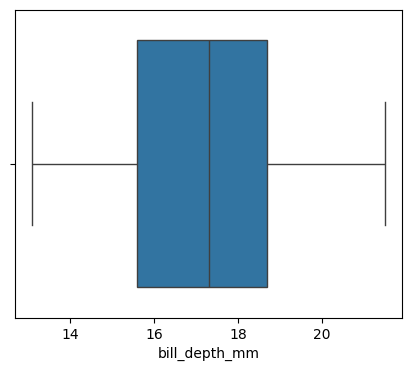

In [318]:
plt.figure(figsize = (5,4))
sns.boxplot(x = df['bill_depth_mm'])
plt.show()

Bill depth column has no outliers

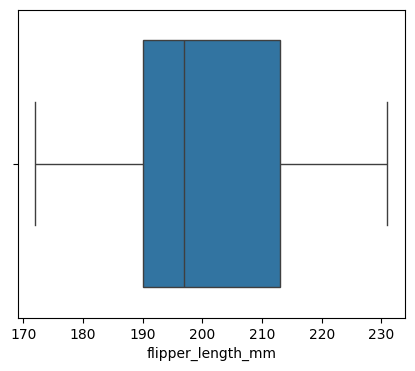

In [321]:
plt.figure(figsize = (5,4))
sns.boxplot(x = df['flipper_length_mm'])
plt.show()

Flipper length has no outliers

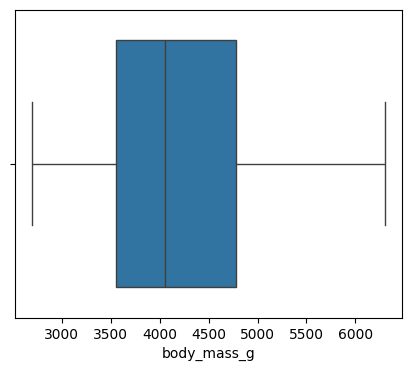

In [324]:
plt.figure(figsize = (5,4))
sns.boxplot(x = df['body_mass_g'])
plt.show()

Body mass column has no outliers

In [327]:
#Identifying categorical and non-categorical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [329]:
#Seperating categorical from non-categorical columns

categorical_columns = []
non_categorical_columns = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        non_categorical_columns.append(i)

print('categorical_columns:', categorical_columns)
print('')
print('non_categorical_columns:', non_categorical_columns)

categorical_columns: ['species', 'island', 'sex']

non_categorical_columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [331]:
#Identifying unique values in the categorical columns

print(df['species'].unique())
print(df['sex'].unique())
print(df['island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Male' 'Female']
['Torgersen' 'Biscoe' 'Dream']


In [333]:
#Describing our dataset

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [432]:
#Converting the species, sex, island columns to non-categorical variables and creating new columns

#Label Encoding

label_encoder = LabelEncoder()

df['species_encoded'] = label_encoder.fit_transform(df['species'])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['island_encoded'] = label_encoder.fit_transform(df['island'])

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,sex_encoded,island_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,2


New non-categorical columns; species_encoded, sex_encoded, island_encoded, have been added to the dataset

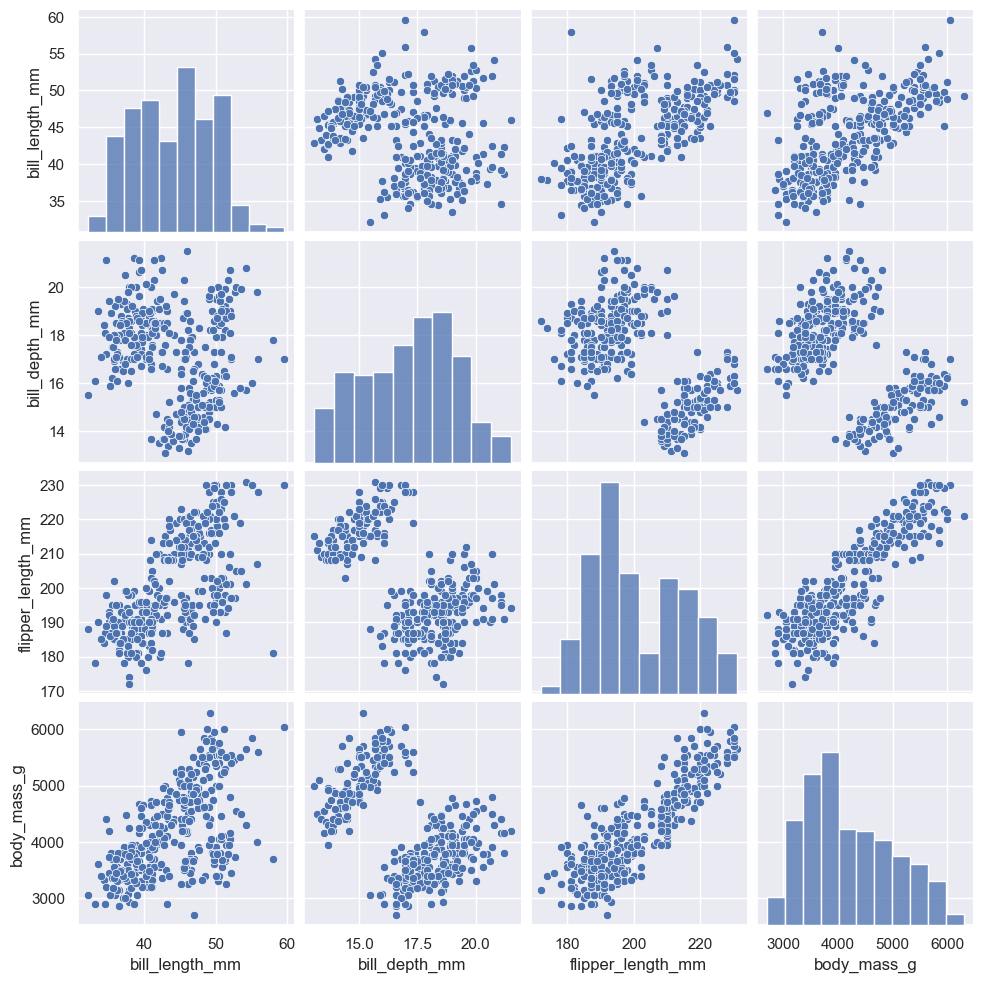

In [414]:
#Visualizing variables with a pairplot

sns.set_theme(style = 'darkgrid')
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]) # Pass numeric variables
plt.show()

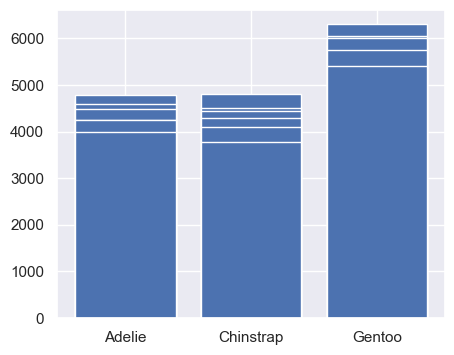

In [416]:
#Barplots

#Body mass per species
x = df['species']
y = df['body_mass_g']

plt.figure(figsize = (5,4))
plt.bar(x, y)
plt.show()

Gentoo Species have the highest body  mass

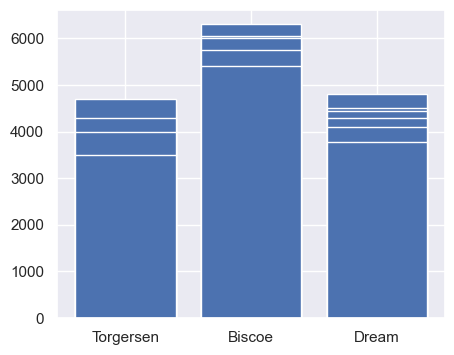

In [418]:
#Body size in each island

z = df['island']
y = df['body_mass_g']

plt.figure(figsize = (5,4))
plt.bar(z, y)
plt.show()

Penguins in Biscoe Island have the largest body mass

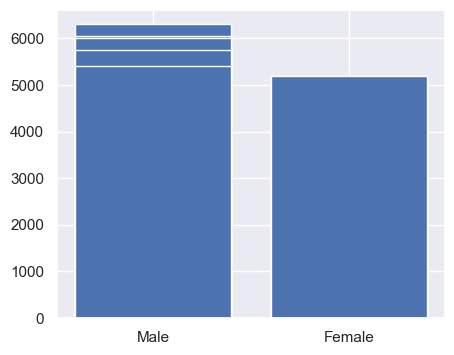

In [420]:
w = df['sex']
y = df['body_mass_g']

plt.figure(figsize = (5,4))
plt.bar(w, y)
plt.show()

Male penguins have the highest body mass

In [339]:
#Correlation matrix

corr_matrix = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


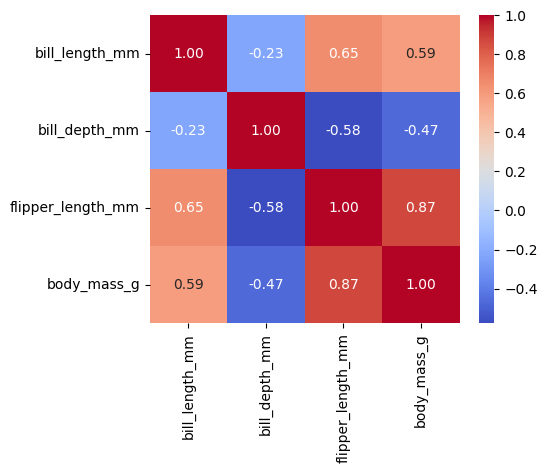

In [342]:
#Heatmap

plt.figure(figsize = (5,4))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [438]:
#Linear Regression


#Determining our x and y variables( Feature Engineering)

x = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'species_encoded', 'sex_encoded', 'island_encoded']]
y = df['body_mass_g']


#Splitting the dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


#Choosing the model

model = LinearRegression()


#fitting and Training the model

model.fit(x_train, y_train)


#Making predictions

y_predict = model.predict(x_test)


#Checking the accuracy of the model

r2 = round(r2_score(y_predict, y_test), 2)
print('The accuracy of the model is:', r2*100, '%')

The accuracy of the model is: 85.0 %
